In [1]:
#Q1.

In [2]:
# Decision Function:
# f(x) = w . x + b ; where x - input features, w - weight vector, b - bias term

In [3]:
#Q2.

In [4]:
# Training objective function:
# minimize ((1/2) ||w||*2)
# Subject to the constraint yi(w . xi + b) >= 1
# Here, w - weight vector, b - bias term, xi - feature vector, yi - class label (yi = plus or minus 1)

# Goal: Find the hyperplane with the maximum margin that separates classes.

In [5]:
#Q3.

In [6]:
# Kernel Trick Purpose: Extend SVM to handle non-linear patterns in data.
# Idea: Transform input features into higher-dimensional space without explicitly calulating new coordinates.
# Kernel Function: Computes the similarity between tranformed data points without explicitly transforming them.
# Popular Kernels: Polynomial, Gaussian (RBF), Sigmoid.
# Benefits: Enables SVM to capture complex relationships in data.
# Example: In 2D, the kernel trick allows dealing with non-linear shapes like circles or spirals efficiently.

In [7]:
#Q4.

In [8]:
# Support Vectors (SVs): Data points crucial for defining the decision boundary (hyperplane) in SVM.
# Role: Influence the position and orientation of the decision boundary.
# Example: Consider a 2D space with two classes (red and blue points). The decision boundary is a line. The support vectors are the points nearest to the decision boundary on both sides.
# Influence: If you move or remove a non-support vector, it won't affect the decision boundary. But changing a support vector's position can alter the decision boundary. They essentially "support" the definition of the boundary.

In [16]:
#Q5.

#Hyperplane:In a 2D space (two features), a hyperplane is a straight line. In 3D, it becomes a plane. In higher dimensions, it's a generalized flat surface.

#Margin:For a 2D hyperplane, the margin is the distance from the hyperplane to the nearest data point of either class.

#Hard Margin: In a well-separated dataset, a hard margin SVM seeks a hyperplane that maximizes the margin, with no points allowed in the margin or on the wrong side.

#Soft Margin: In a dataset with some overlapping points or noise, a soft margin SVM allows for a few misclassifications, providing a balance between maximizing the margin and allowing some errors.

In [11]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.7 MB/s eta 0:00:00


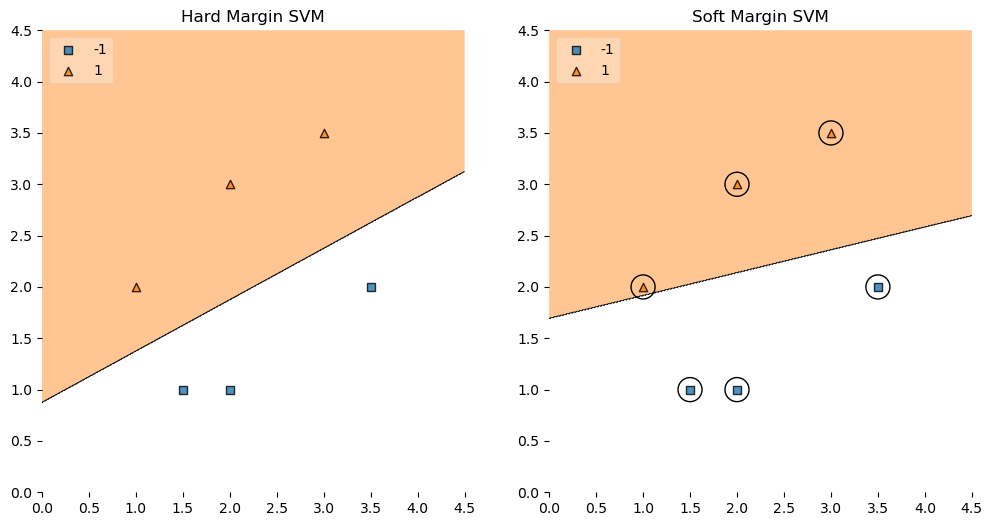

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Sample data
X = np.array([[1, 2], [2, 3], [3, 3.5], [3.5, 2], [2, 1], [1.5, 1]])
y = [1, 1, 1, -1, -1, -1]

# Fit SVM model (Hard Margin)
clf_hard = SVC(kernel='linear', C=1e10)
clf_hard.fit(X, y)

# Fit SVM model (Soft Margin)
clf_soft = SVC(kernel='linear', C=0.1)
clf_soft.fit(X, y)

# Plot decision boundaries and margins
plt.figure(figsize=(12, 6))

# Hard Margin SVM
plt.subplot(1, 2, 1)
plot_decision_regions(X, np.array(y), clf_hard, legend=2)
plt.title('Hard Margin SVM')

# Soft Margin SVM
plt.subplot(1, 2, 2)
plot_decision_regions(X, np.array(y), clf_soft, legend=2)
plt.scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
plt.title('Soft Margin SVM')

plt.show()


In [39]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.9 MB/s eta 0:00:00a 0:00:01


In [1]:
# Q6.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [82]:
iris = datasets.load_iris()

In [83]:
# Segregate independent and dependent features

X = iris.data[:,:2]
y= iris.target

In [84]:
X = np.array(X)

In [85]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [87]:
y_pred = svm_classifier.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


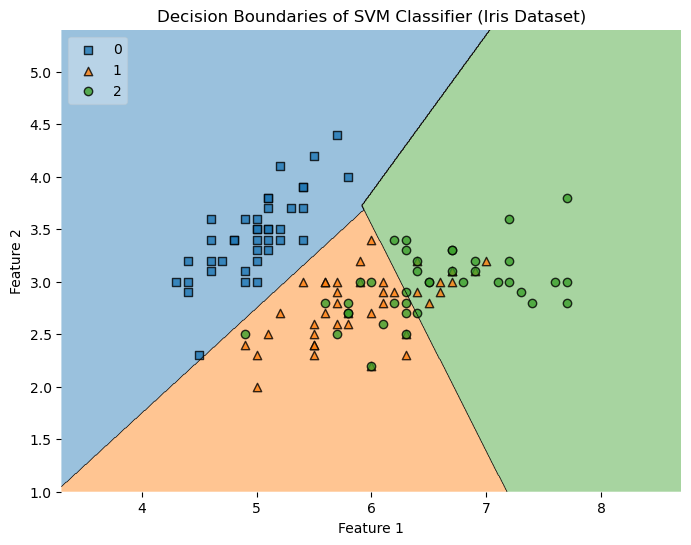

In [89]:
# Visualizing decision boundaries using two features
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, clf=svm_classifier,legend=2)
plt.title('Decision Boundaries of SVM Classifier (Iris Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [90]:
# Trying different values of C

In [119]:
#defining parameter range
parameter = {
    'C':[0.001,0.01,0.1,1,5,10,100,1000]
}

In [120]:
grid_search = GridSearchCV(svm_classifier,param_grid=parameter,cv=5,refit=True,verbose=3)

In [121]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...........................C=0.001;, score=0.708 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.333 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.333 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.333 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.333 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.708 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.333 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.333 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.333 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.333 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.708 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]},
             verbose=3)

In [122]:
grid_search.best_params_

{'C': 1}

In [123]:
best_svm_classifier = SVC(kernel='linear',C=1)
best_svm_classifier.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [124]:
y_pred = best_svm_classifier.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best C value: {accuracy:.2f}")

Accuracy with the best C value: 0.90
